# Simple regression with TensorFlow

Basic TF experiments

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.13.1


In [3]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

Get training data

In [4]:
dat = pd.read_csv("./rbfs/phi_1_reduce.csv")
dat.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,211,212,213,214,215,216,y,site,date,normalized_time
0,0,1.000000,0.933712,0.760067,0.539408,0.333740,0.180022,0.084658,0.034709,0.012406,...,0.0,0.0,0.0,0.0,0.0,0.0,0.063,2005,2023-06-30,0.000000
1,1,0.999951,0.937103,0.765636,0.545359,0.338664,0.183351,0.086541,0.035611,0.012775,...,0.0,0.0,0.0,0.0,0.0,0.0,0.061,2005,2023-06-30,0.002976
2,2,0.999803,0.940414,0.771169,0.551323,0.343628,0.186723,0.088457,0.036534,0.013155,...,0.0,0.0,0.0,0.0,0.0,0.0,0.057,2005,2023-06-30,0.005952
3,3,0.999557,0.943643,0.776666,0.557296,0.348630,0.190138,0.090406,0.037476,0.013544,...,0.0,0.0,0.0,0.0,0.0,0.0,0.049,2005,2023-06-30,0.008929
4,4,0.999213,0.946791,0.782125,0.563279,0.353670,0.193597,0.092390,0.038439,0.013943,...,0.0,0.0,0.0,0.0,0.0,0.0,0.044,2005,2023-06-30,0.011905


In [5]:
dat.shape

(2673, 222)

In [6]:
X_train = dat.iloc[:, 1:218].to_numpy()
y_train = dat['y'].to_numpy()
t_train = dat['normalized_time']

(array([ 17.,  90., 204., 336., 540., 529., 483., 368.,  77.,  29.]),
 array([0.002 , 0.0102, 0.0184, 0.0266, 0.0348, 0.043 , 0.0512, 0.0594,
        0.0676, 0.0758, 0.084 ]),
 <BarContainer object of 10 artists>)

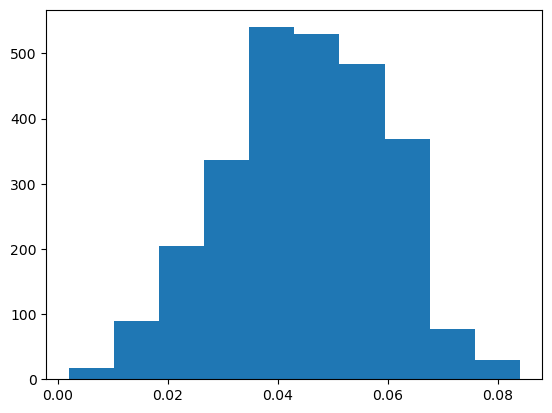

In [7]:
plt.hist(y_train)

Get data for predictions

In [8]:
dat_pred = pd.read_csv("./rbfs/phi_2_reduce.csv")
dat_pred.shape

(94272, 221)

In [9]:
X_test = dat_pred.iloc[:, 1:218].to_numpy()
y_test = dat_pred['y'].to_numpy()
t_test = dat_pred['normalized_time']

(array([1.2350e+03, 9.3960e+03, 1.1907e+04, 1.7141e+04, 2.8420e+04,
        2.0824e+04, 2.2600e+03, 4.0300e+02, 1.0000e+01, 2.0000e+00]),
 array([-0.0083 ,  0.00408,  0.01646,  0.02884,  0.04122,  0.0536 ,
         0.06598,  0.07836,  0.09074,  0.10312,  0.1155 ]),
 <BarContainer object of 10 artists>)

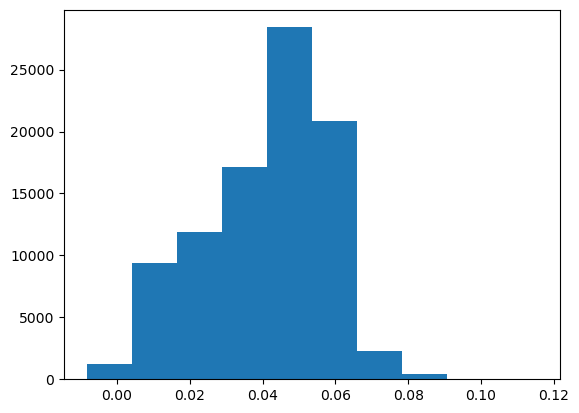

In [10]:
plt.hist(y_test)

## TensorFlow

In [11]:
# Set random seed
tf.random.set_seed(42)
from keras import Sequential
from keras import models
from keras import layers

In [12]:
n_feat = X_train.shape[1]

### Model 1 (Simple TF regression)

In [13]:
model = models.Sequential([
  layers.Dense(512, activation='relu', input_shape=(n_feat,)),
  layers.Dense(512, activation='relu'),
  layers.Dense(256, activation='relu'),
  layers.Dense(256, activation='relu'),
  layers.Dense(128, activation='relu'),
  layers.Dense(1, activation='linear')
], name="Initial_model")
model.summary()

Model: "Initial_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               111616    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 604417 (2.31 MB)
Trainable params: 6044

In [14]:
# Compile the model
initial_learning_rate = 0.00001
optimizer = keras.optimizers.Adam(learning_rate=initial_learning_rate)
model.compile(loss='mae', metrics=['mae', 'mse'], optimizer='adam')

In [15]:
history=model.fit(X_train, y_train, epochs=50, 
                  batch_size=1024, verbose=1, 
                  validation_split=0.2)

Epoch 1/50
3/3 [==============================] - 0s 61ms/step - loss: 0.1767 - mae: 0.1767 - mse: 0.0422 - val_loss: 0.0432 - val_mae: 0.0432 - val_mse: 0.0024
Epoch 2/50
3/3 [==============================] - 0s 17ms/step - loss: 0.0401 - mae: 0.0401 - mse: 0.0021 - val_loss: 0.0289 - val_mae: 0.0289 - val_mse: 0.0011
Epoch 3/50
3/3 [==============================] - 0s 24ms/step - loss: 0.0224 - mae: 0.0224 - mse: 7.5811e-04 - val_loss: 0.0180 - val_mae: 0.0180 - val_mse: 4.7924e-04
Epoch 4/50
3/3 [==============================] - 0s 17ms/step - loss: 0.0153 - mae: 0.0153 - mse: 3.5888e-04 - val_loss: 0.0146 - val_mae: 0.0146 - val_mse: 3.3469e-04
Epoch 5/50
3/3 [==============================] - 0s 17ms/step - loss: 0.0137 - mae: 0.0137 - mse: 2.8544e-04 - val_loss: 0.0172 - val_mae: 0.0172 - val_mse: 4.2966e-04
Epoch 6/50
3/3 [==============================] - 0s 18ms/step - loss: 0.0137 - mae: 0.0137 - mse: 2.7350e-04 - val_loss: 0.0146 - val_mae: 0.0146 - val_mse: 3.2857e-04
Ep

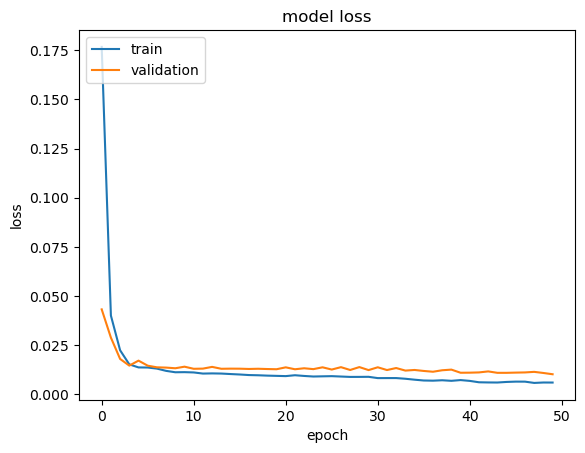

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [17]:
y_test_pred = model.predict(X_test)
#mean_absolute_error(y_test, y_test_pred)

2946/2946 [==============================] - 3s 979us/step


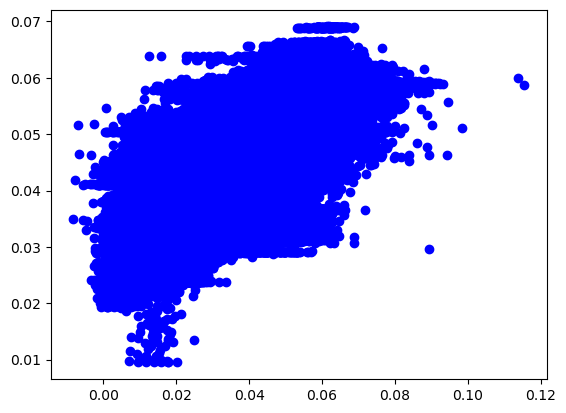

In [18]:
plt.plot(y_test, y_test_pred, 'bo')

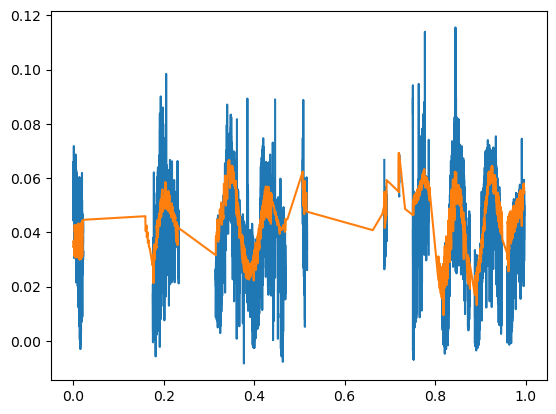

In [19]:
plt.plot(t_test, y_test)
plt.plot(t_test, y_test_pred)
plt.show()

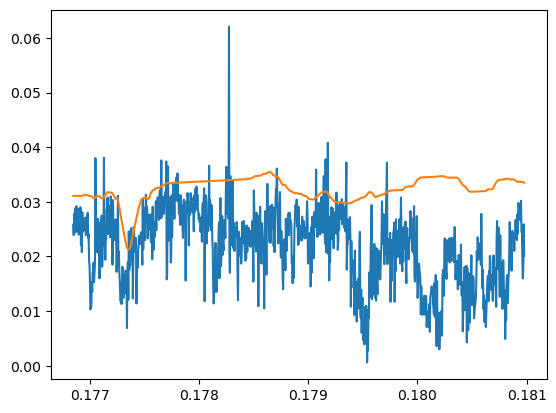

In [28]:
plt.plot(t_test[5500:6500], y_test[5500:6500])
plt.plot(t_test[5500:6500], y_test_pred[5500:6500])
plt.show()